In [1]:
import numpy as np

In [6]:
!pip install pandas


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 10.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 14.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 10.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 7.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 6.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 5.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.1 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   -------------------

In [7]:
!pip install matplotlib

In [13]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.7 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.7 MB 10.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.7 MB 8.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.7 MB 8.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.7 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/10.7 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 6.3/10.7 MB 4.3 MB/s eta 0:00:02
   ----------------------- ---------------- 6.3/10.7 MB 4.3 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 6.8/10.7 MB 3.3 MB/s eta 0:00:02
   ------------------------- -------------- 6.8/10.7 MB 3.3 MB/s eta 0:00:02
   -------------------------- ------------- 7.1/10.7 MB 2.7 MB/s eta 0:00:02
   -

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [19]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=10)

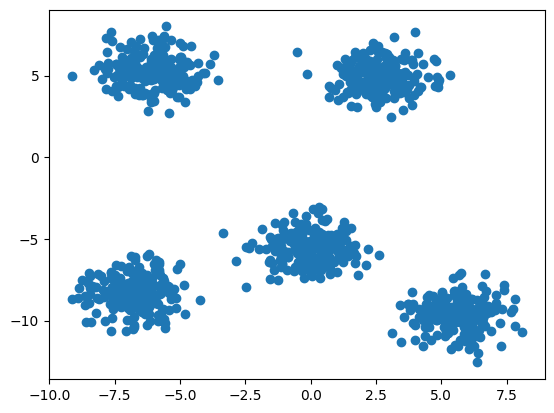

In [20]:
plt.scatter(x[:, 0],x[:, 1])
plt.show()

In [21]:
#our goal is to make clusters out of this data

In [26]:
k  =5
colors = ["green", "blue","red", "yellow", "gray"]
clusters = {}
for each_cluster in range(k):
    #step1 to initialize cluster centers randomly
    center = 10*(2* np.random.random((x.shape[1],))-1)
    points = []

    cluster = {
    'center' : center,
    'points' : points,
    'color': colors[each_cluster]
    }

    clusters[each_cluster] = cluster
    

In [27]:
clusters

{0: {'center': array([ 5.77408784, -9.94766494]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-4.15532726, -8.54812184]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([5.84932251, 0.16366729]), 'points': [], 'color': 'red'},
 3: {'center': array([-5.04083789,  1.4276684 ]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-6.55757596, -9.12716391]),
  'points': [],
  'color': 'gray'}}

In [28]:
#step2 distance and assigning points to clusters

In [30]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [35]:
# assigning every data point to one of the cluster
#Expectation E step below


In [73]:
def assignPointsToClusters(clusters):
    
    for every_data_point in range(x.shape[0]):
        dist = []
        current_x = x[every_data_point]
        for kx in range(k):

            d  = distance( current_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])

In [74]:
# maximaixing step
#STEP 3
#update cluster center by taking mean

In [75]:
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:

            #we will find out mean
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

In [88]:
def plotClusters(clusters):
    for kx in  range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            plt.scatter(pts[:,0], pts[:, 1], color=clusters[kx]['color'])

        plt.scatter(clusters[kx]['center'][0], clusters[kx]['center'][1], color='black', marker='*')

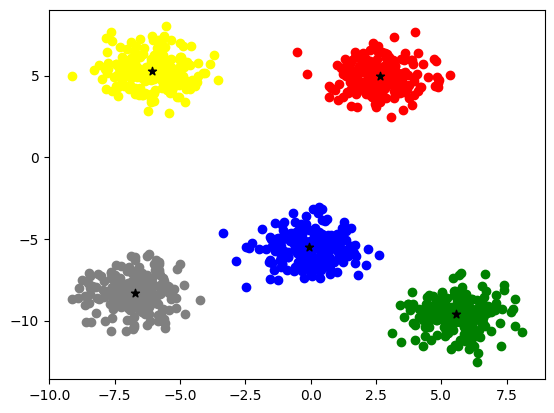

In [99]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)